# Transit Costs Project

---
### Andrew Chu, Donald Bookman
---

### Introduction
---

Why do some transit lines cost more per kilometer than others? Using the Transit Costs Project data, we can find answers to our questions. Our data came from transitcosts.com but we used a tidied .csv file from the tidy Tuesday github link. The data was collected by researchers through a variety of sources such as wikipedia, the media, city plans, etc. The cases used were Boston, Istanbul, New York, Milan, London. The main variables of this project are country, city, and cost/km in millions of USD. Although other variables are important to look at, these are the major ones. We believe that transit lines cost more to build per kilometer in New York and California because of the higher cost of living compared to other cities.

### Data
---

Variable Meanings

Below are the 21 variables in the Transit Cost Dataset
- e  - Variable identifier to track entries
- country - Country code. In further detail the code gives the abbreviations for each country described in the dataset
- city - The city that the transit line is being built in
- line - The name of the transit line
- start_year - The year that the transit line’s construction was started
- end_year - The year that the transit line’s construction ended (predicted or actual)
- rr - Boolean flag for if the transit line is a railroad or not
- length - Proposed length for the transit line in kilometers (km)
- tunnel_per - Percent of transit line completed as of the most recent update to the dataset
- tunnel - Total length of line completed in km as of the most recent update to the dataset
- stations - Number of stations where passengers can board/leave the transit line
- source1 - The source of the data entry
- cost - Cost in millions in local currency
- currency - Currency type of the area
- year - Midpoint year of construction
- ppp_rate - Purchasing power parity (PPP), based on the midpoint of construction. Purchasing power parity is a measurement of prices in different countries that uses the prices of specific goods to compare the absolute purchasing power of the countries' currencies
- real_cost - Cost in Millions of USD
- cost_km_millions - Cost/km in millions of USD
- source2 - The source of the cost data
- reference - Reference URL for sources

### Data Analysis Plan
---

The main outcome variable - cost_km_millions

Predictor variables - real_cost, length, and stations

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
test = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-05/transit_cost.csv')

In [38]:
test_sorted = test.sort_values(by='cost_km_millions', ascending=False)
test_sorted = test_sorted.dropna()
test_sorted.head(15)

,e,country,city,line,start_year,end_year,rr,length,tunnel_per,tunnel,stations,source1,cost,currency,year,ppp_rate,real_cost,cost_km_millions,source2,reference
138,7411.0,US,New York,East Side Access,2007,2022,1.0,2.8,100.00%,2.8,1.0,Measured,11000.0,USD,2015.0,1.000000,11000,3928.571429,Media,https://www.nytimes.com/2018/04/25/nyregion/mt...
137,7410.0,US,New York,Second Avenue Phase 2,2019,2029,0.0,2.6,100.00%,2.6,3.0,Measured,6390.0,USD,2024.0,1.000000,6390,2457.692308,Plan,https://www.transit.dot.gov/sites/fta.dot.gov/...
139,7416.0,US,New York,Gateway,2019,2026,1.0,5.3,100.00%,5.3,0.0,Measured,9500.0,USD,2023.0,1.000000,9500,1792.452830,Plan,https://www.masstransitmag.com/rail/infrastruc...
136,7409.0,US,New York,Second Avenue Phase 1,2007,2016,0.0,2.7,100.00%,2.7,3.0,Measured,4450.0,USD,2012.0,1.000000,4450,1648.148148,Media,https://www.nytimes.com/2016/12/19/nyregion/se...
135,7408.0,US,New York,7 extension,2007,2014,0.0,1.6,100.00%,1.6,1.0,Measured,2400.0,USD,2011.0,1.000000,2400,1500.000000,Plan,http://web.mta.info/nyct/service/new7LineExten...
96,7329.0,SG,Singapore,Circle Line Stage 6,2017,2025,0.0,4.0,100.00%,4.0,3.0,Media,4850.0,SGD,2021.0,1.130000,5480.5,1370.125000,Media,https://www.straitstimes.com/singapore/transpo...
8,7152.0,US,Los Angeles,Purple Phase 3,2020,2027,0.0,4.2,100.00%,4.2,2.0,Media,3600.0,USD,2023.0,1.000000,3600,857.142857,Media,https://la.streetsblog.org/2020/03/24/metro-si...
150,7435.0,NZ,Auckland,City Rail Link,2013,2024,1.0,3.5,100.00%,3.5,4.0,Wiki,4419.0,NZD,2018.0,0.677000,2991.663,854.760857,Plan,https://ourauckland.aucklandcouncil.govt.nz/ar...
71,7280.0,AU,Melbourne,Metro Tunnel,2018,2025,0.0,9.0,100.00%,9.0,5.0,Plan,11000.0,AUD,2021.0,0.690000,7590,843.333333,Plan,https://metrotunnel.vic.gov.au/about-the-proje...
15,7163.0,US,San Jose,BART,2022,2030,0.0,9.6,83.00%,8.0,4.0,Plan,6900.0,USD,2026.0,1.000000,6900,718.750000,Plan,https://www.mercurynews.com/2020/07/19/with-co...


Text(0, 0.5, 'Cities')

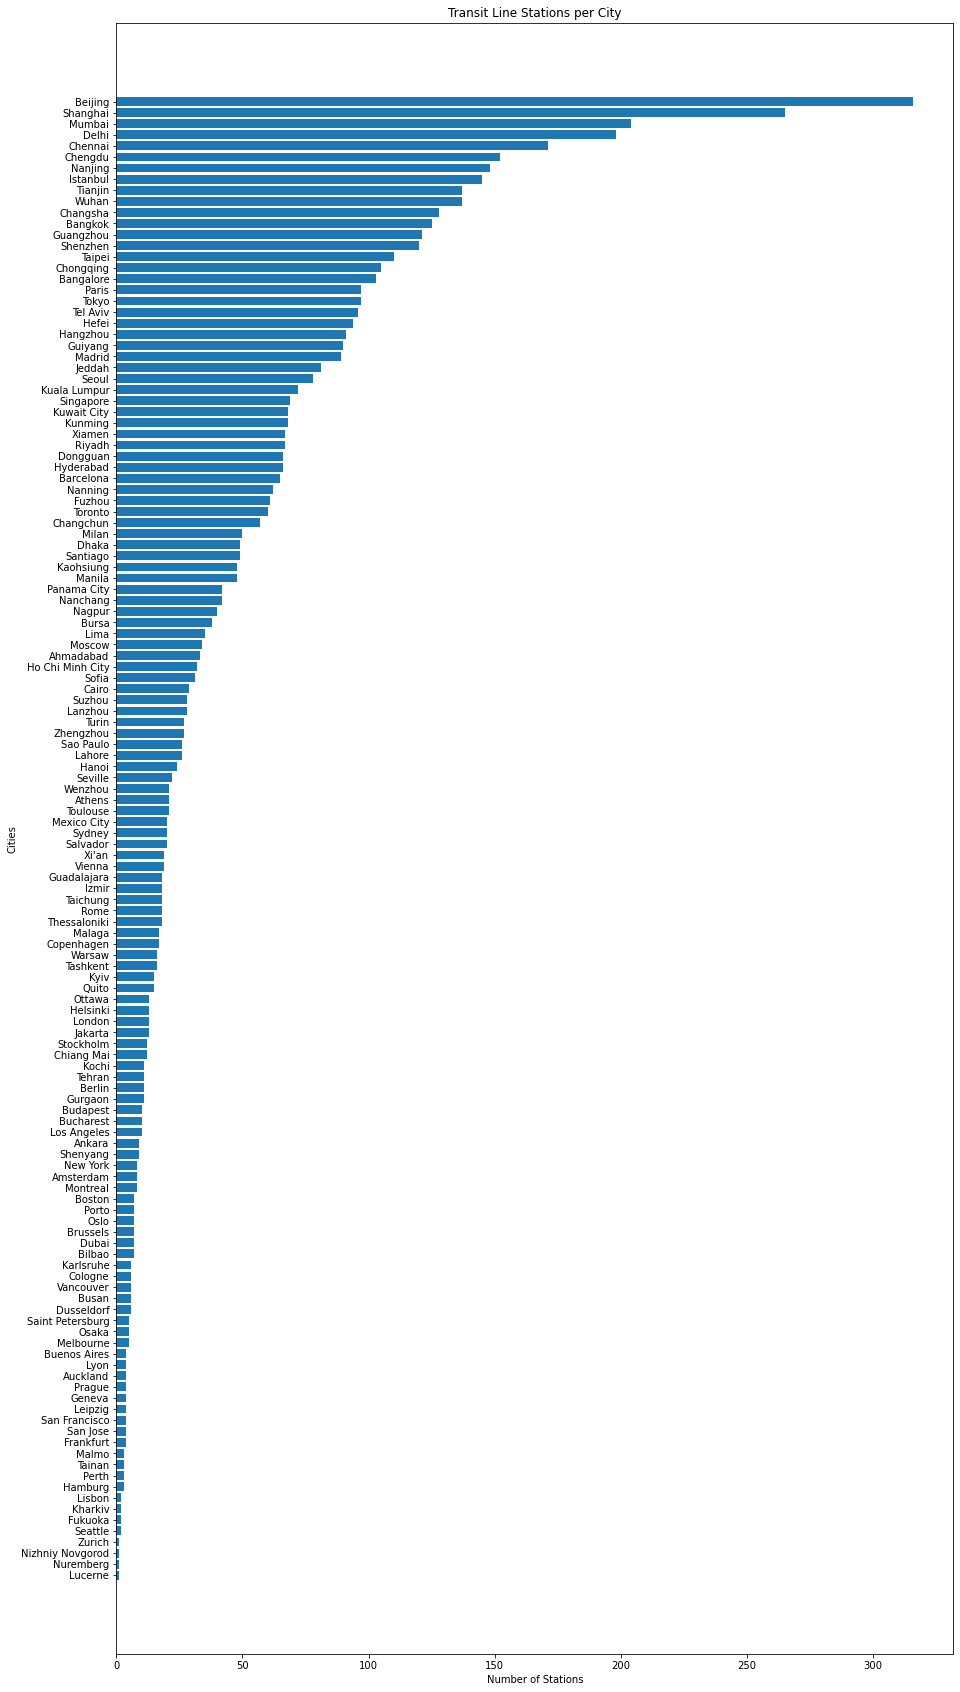

In [39]:
stations = test_sorted[['city', 'stations']]
stations_grouped = stations.groupby('city', as_index=False).sum()

station_final = stations_grouped.sort_values('stations')

plt.figure(figsize=(15,30))
plt.rcParams['font.size'] = '10'
plt.barh(station_final['city'], station_final['stations'])
plt.title("Transit Line Stations per City")
plt.xlabel("Number of Stations")
plt.ylabel("Cities")

Text(0, 0.5, 'Countries')

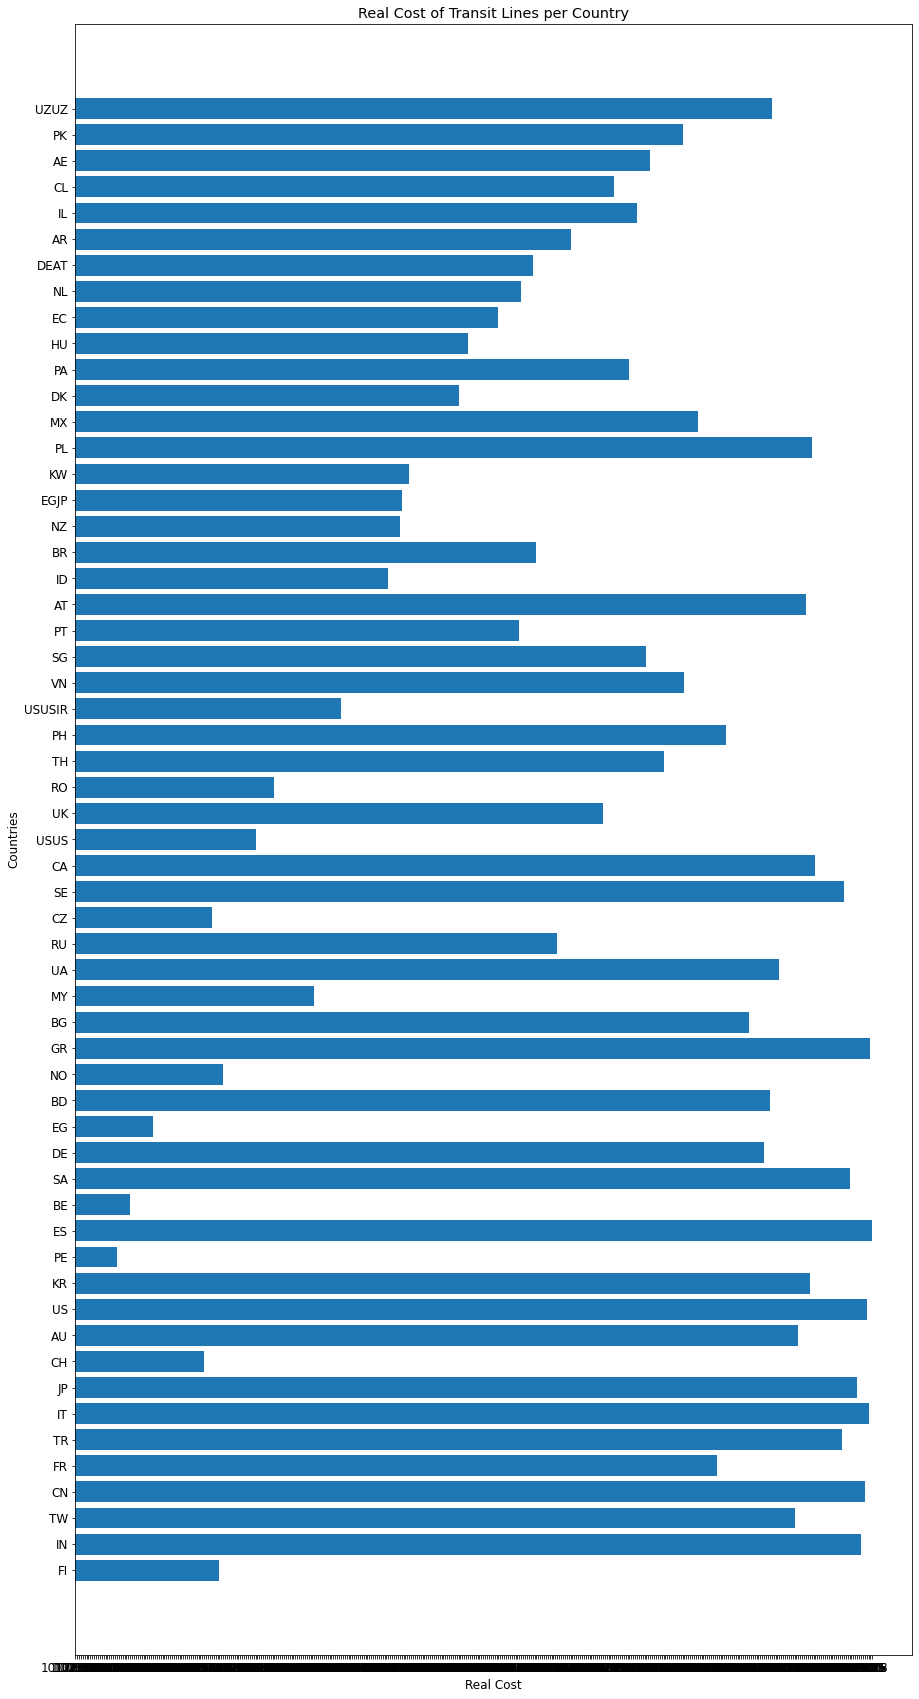

In [41]:
real_cost_country = test_sorted[['country', 'real_cost']]
real_cost_country_grouped = real_cost_country.groupby('real_cost', as_index=False).sum()

real_cost_country_final = real_cost_country_grouped.sort_values('real_cost')

plt.figure(figsize=(15,30))
plt.rcParams['font.size'] = '12'
plt.barh(real_cost_country_final['country'], real_cost_country_final['real_cost'])
plt.title("Real Cost of Transit Lines per Country")
plt.xlabel("Real Cost")
plt.ylabel("Countries")

For our preliminary exploratory analysis, we noticed that when you sort the data by the variable “cost_km_millions” (descending), the top five cities were New York. This means that New York is the least cost efficient per kilometer. When taking a look at the most cost efficient transit lines, we noticed that most were extensions or small parts of larger, existing transit lines.

As we comb through the data, I believe organizing the data as a histogram would be helpful in visualizing the data. Especially since we are comparing the cost efficiency of the lines of each country. 

After organizing the data into histograms, we hope to see New York as the city with the highest cost/km statistic to support our hypothesis however, if the data supports another theory, we will tell that story.

### Intermediate Results
---

Text(0, 0.5, 'Cities')

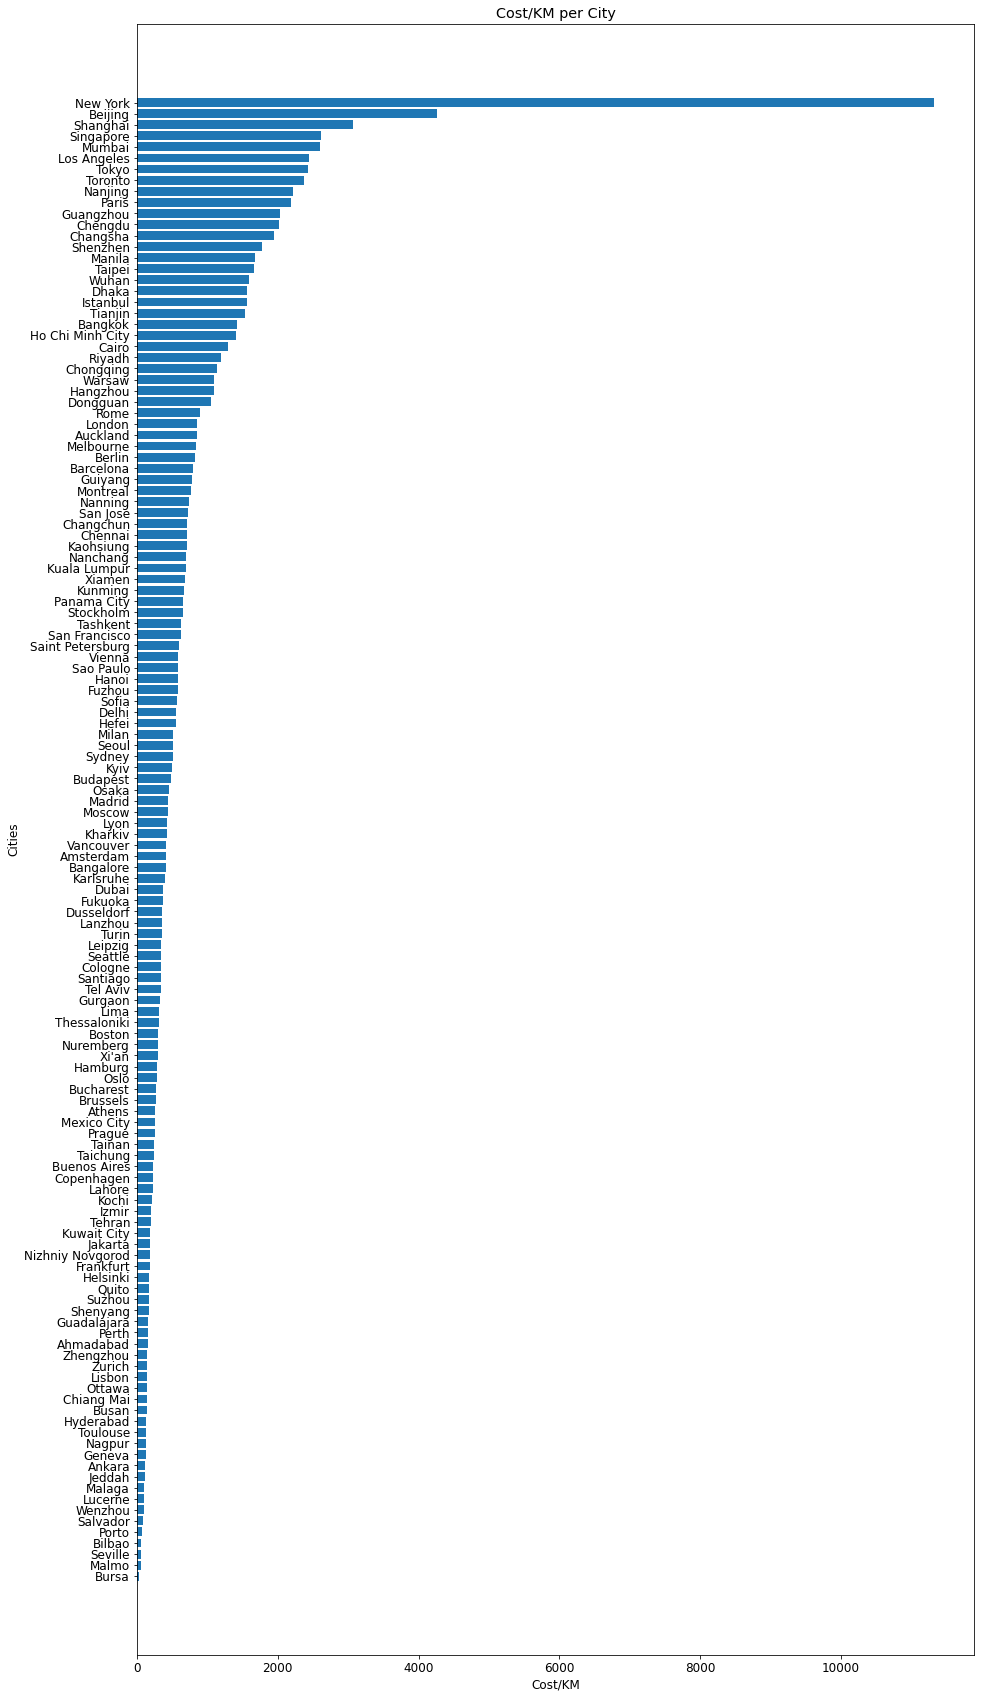

In [42]:
cities_and_cost = test_sorted[['city', 'cost_km_millions']]
cities_and_cost_grouped = cities_and_cost.groupby('city', as_index=False).sum()

cities_and_cost_graph = cities_and_cost_grouped.sort_values('cost_km_millions')

plt.figure(figsize=(15,30))
plt.rcParams['font.size'] = '12'
plt.barh(cities_and_cost_graph['city'], cities_and_cost_graph['cost_km_millions'])
plt.title("Cost/KM per City")
plt.xlabel("Cost/KM")
plt.ylabel("Cities")

In [48]:
cities_and_cost_graph.sort_values('cost_km_millions', ascending=False).head(5)

,city,cost_km_millions
82,New York,11326.864715
8,Beijing,4261.260000
105,Shanghai,3066.360000
108,Singapore,2618.509859
77,Mumbai,2598.462637


Our first visual displayed the total cost/km of transit lines from each city and all of their projects. This visual wasn't really targeted at anything specific and was more of a way to see the data generally. From the table we made and the resulting graph, we can see that major cities populate the upper end of the data. New York ahead of the rest of the cities by a significant amount. Since the scope of the data was too wide, we decided to focus in on fewer lines.

Text(0, 0.5, 'Cities')

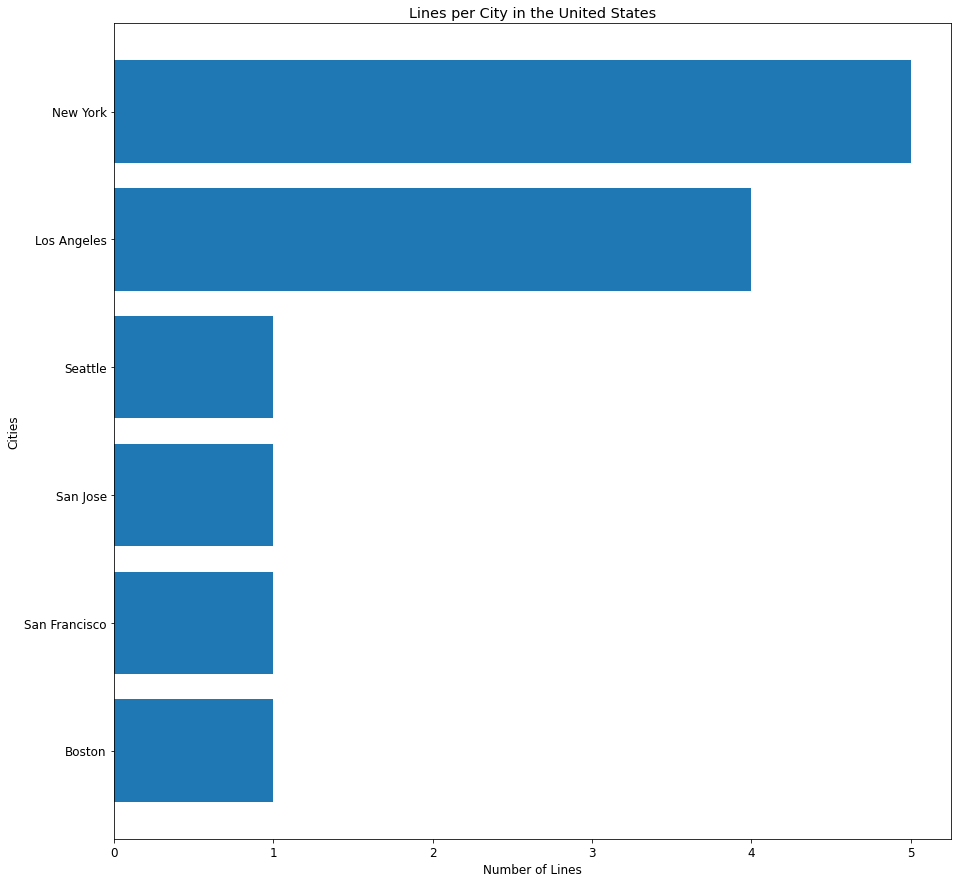

In [44]:
US_lines = test_sorted[['country','city','line']]

where_US = (US_lines["country"] == 'US')
table_where_US = US_lines[where_US]

table_US = table_where_US.drop(columns=["country"])

table_US = table_US.groupby('city', as_index=False).count()

table_where_US_graph = table_US.sort_values('line')

plt.figure(figsize=(15,15))
plt.rcParams['font.size'] = '12'
plt.barh(table_where_US_graph['city'], table_where_US_graph['line'])
plt.title("Lines per City in the United States")
plt.xlabel("Number of Lines")
plt.ylabel("Cities")

After flitering the data to only the transit lines in the United States and grouping them by city, we saw that not many cities were even on the list. The 6 cities that were shown are major cities with New York and Los Angeles having relatively higher costs of living. When constructing lines in areas of the coutry where the rate of living higher, you are able to charge the residents more because for transit lines and even transportation is based on the area. If I were to live in Los Angeles, I would be paying signifcantly more for tansit costs than I would be constructing a transit line in Pennslyvania. But, let's see if this holds true in their average cost per transit line.

Text(0, 0.5, 'Cost/KM ($)')

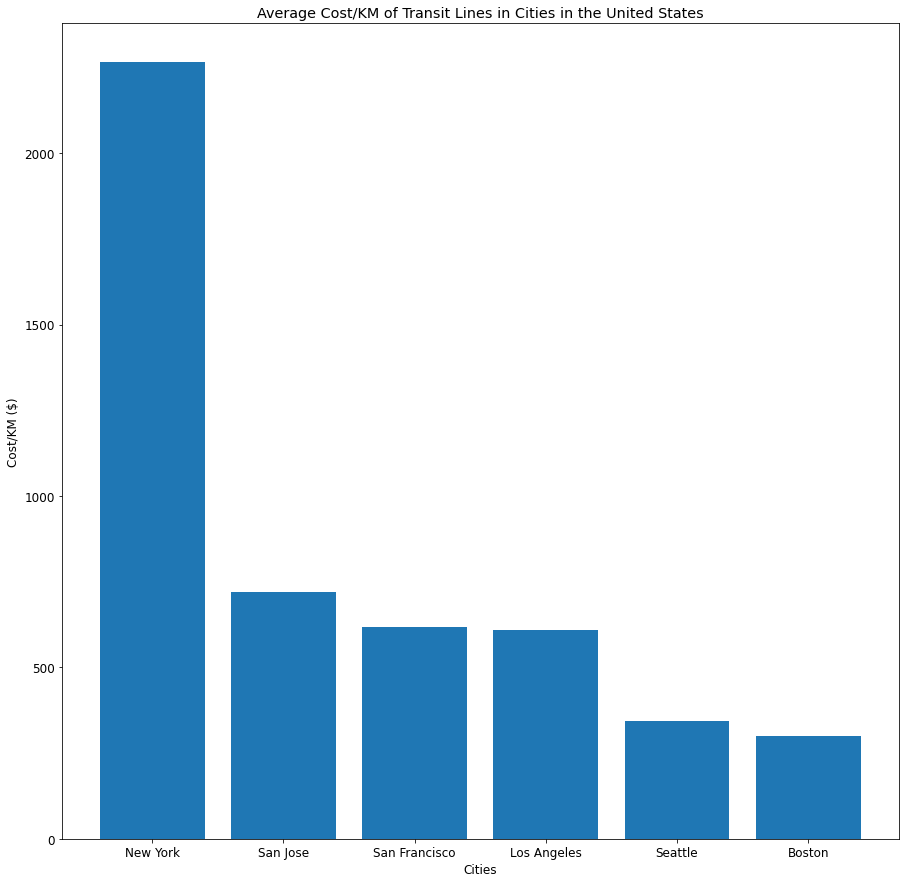

In [45]:
US_lines = test_sorted[['country','city','cost_km_millions']]

where_US = (US_lines["country"] == 'US')
table_where_US = US_lines[where_US]

table_US = table_where_US.drop(columns=["country"])

table_US = table_US.groupby('city', as_index=False).mean()

table_where_US_graph = table_US.sort_values('cost_km_millions', ascending=False)

plt.figure(figsize=(15,15))
plt.rcParams['font.size'] = '12'
plt.bar(table_where_US_graph['city'], table_where_US_graph['cost_km_millions'])
plt.title("Average Cost/KM of Transit Lines in Cities in the United States")
plt.xlabel("Cities")
plt.ylabel("Cost/KM ($)")

After averaging the cost per transit line within these cities, it is apparent that building transit lines in New York is more expensive than the other cities. Even though Los Angeles has a high cost of living similar to New York, its average cost per transit line is actually lower than a few other smaller cities. This sort of disproves our original hypothesis that transit lines cost more to build per kilometer in New York and California because of the higher cost of living compared to other cities. Additionally, we can sort of rule out the effect of east/west coast on the cost of the transit lines since Boston had the lowest average cost while New York had the highest. However, the small sample size concerns me because the results could be skewed.

Text(0, 0.5, 'Cost/KM ($)')

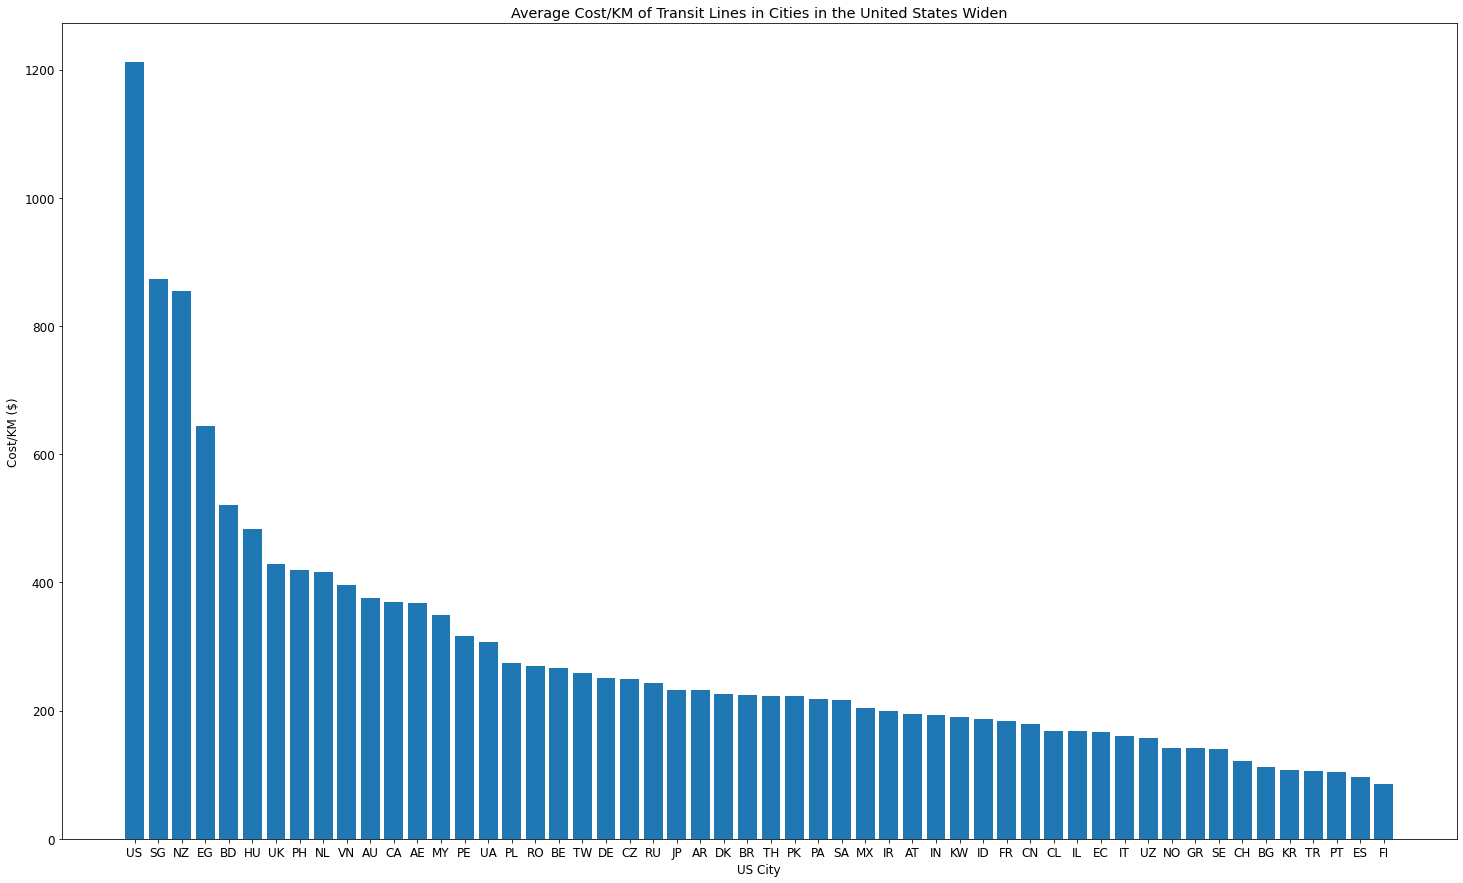

In [54]:
countries_and_cost = test_sorted[['country', 'cost_km_millions']]
countries_and_cost_grouped = countries_and_cost.groupby('country', as_index=False).mean()

countries_and_cost_graph = countries_and_cost_grouped.sort_values('cost_km_millions', ascending=False)

plt.figure(figsize=(25,15))
plt.rcParams['font.size'] = '12'
plt.bar(countries_and_cost_graph['country'], countries_and_cost_graph['cost_km_millions'])
plt.title("Average Cost/KM of Transit Lines in Cities in the United States Widen")
plt.xlabel("US City")
plt.ylabel("Cost/KM ($)")

We were concerned with the small sample size of transit lines in the United States so we decided to widen the scope but organize it by countries. We graphed countries and their average cost per kilometer for transit lines. The United States' average is extremely high but this is cause by New York's high costs. It's interesting to see that the next countries on the list were Singapore, New Zealand, and Egypt. This would lead me to believe that the environment plays a role in the cost of the transit lines. 

Text(0, 0.5, 'Cost/KM ($)')

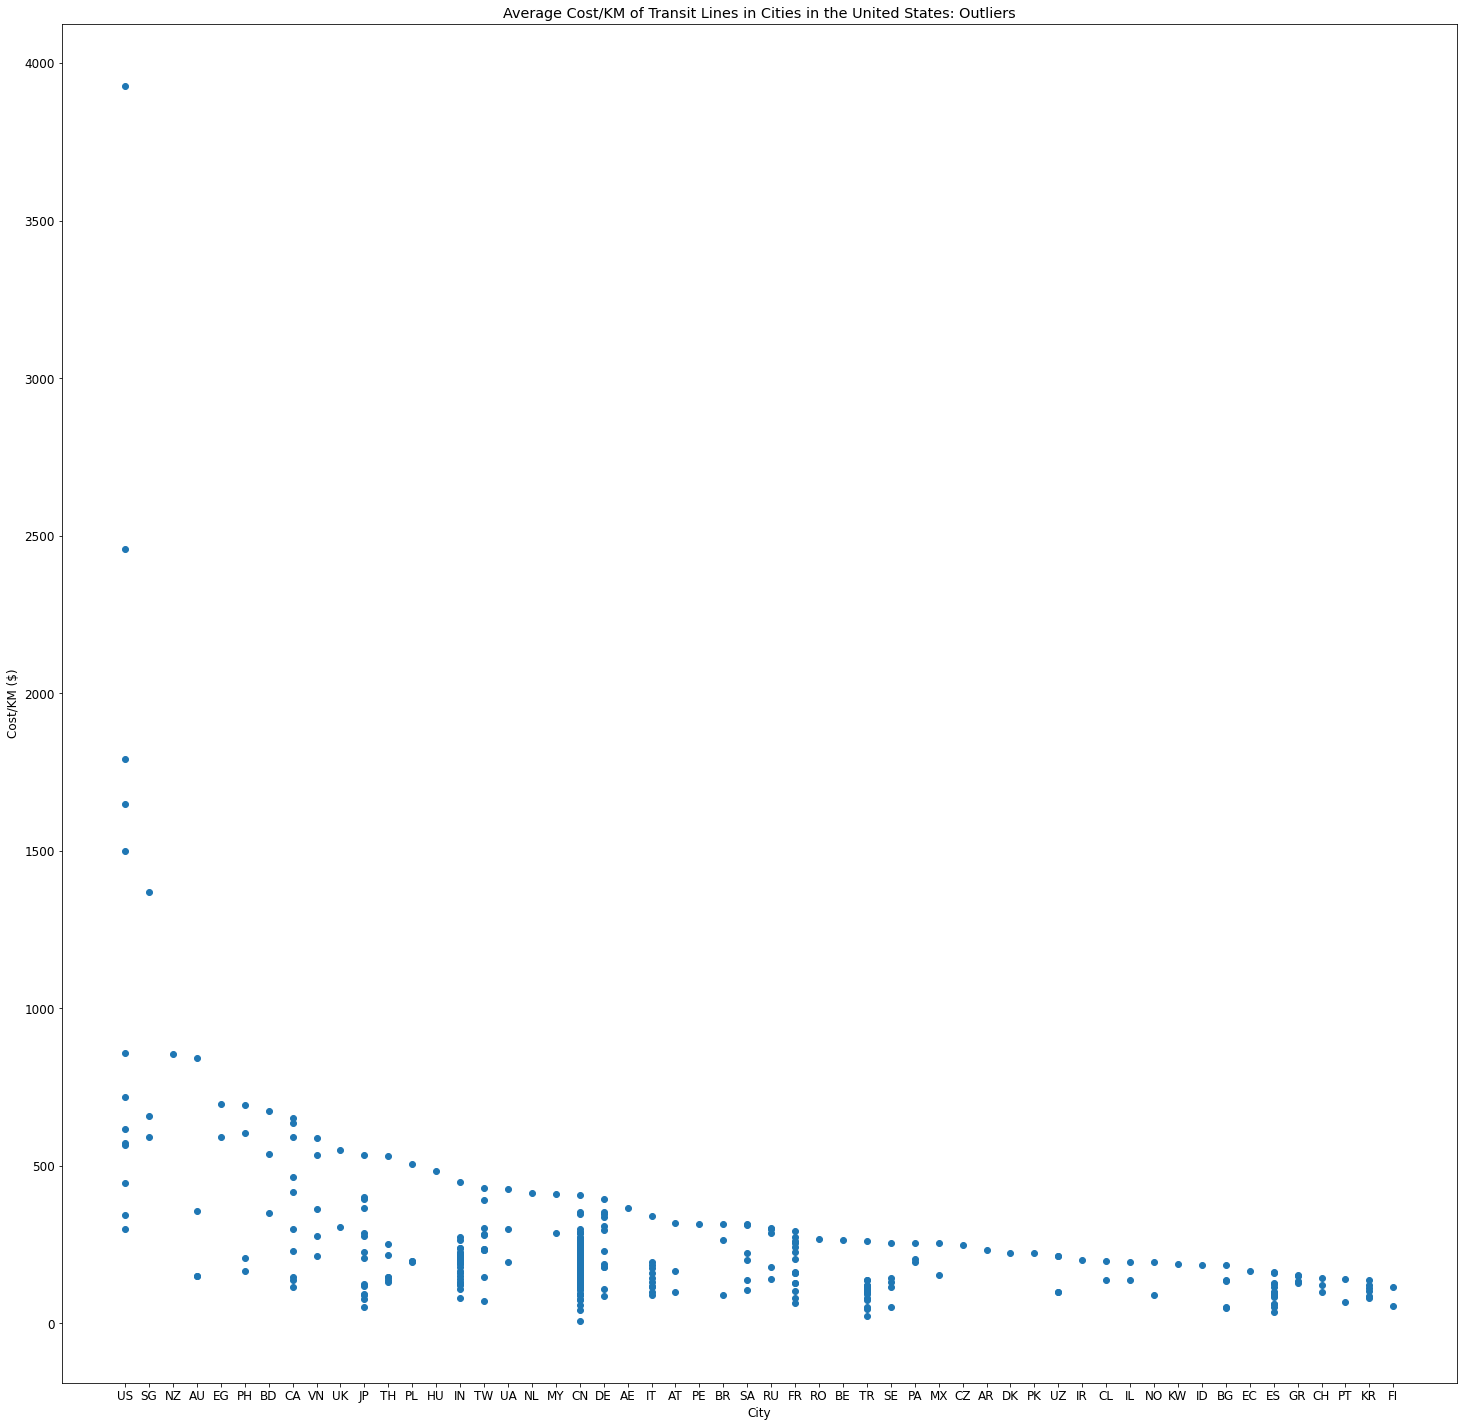

In [53]:
countries_and_cost = test_sorted[['country', 'cost_km_millions']]

countries_and_cost_graph = countries_and_cost.sort_values('cost_km_millions', ascending=False)

plt.figure(figsize=(25,25))
plt.rcParams['font.size'] = '12'
plt.scatter(countries_and_cost_graph['country'], countries_and_cost_graph['cost_km_millions'])
plt.title("Average Cost/KM of Transit Lines in Cities in the United States: Outliers")
plt.xlabel("City")
plt.ylabel("Cost/KM ($)")

Next we decided to create of scatter plot of the previous graph to check for countries with a small sample size and put that into perspective with the outliers that some countries may have. By looking at the outliers in this way, we are able to see where the consistencies lie within the trends of certain cities. A trend we also have seen almost accidently in the scatter plot that we could'nt see in the bar graphs were how in certain cities, the cost of transit lines are not even comparable to the outliers of other cities with multiple lines because there is only one single transit line in these certain cities in the United States like AR, DK, and CZ.